In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.animation as animation
import glob
from matplotlib.animation import PillowWriter

In [13]:
nx=1024
ny=512

output_name='dustydisk_2'
data_name = 'dustdens'
output_number='31'

archivo_x = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+ output_name +'/domain_x.dat'
archivo_y = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+ output_name +'/domain_y.dat'
archivo_data0 = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+data_name+'0.dat'
archivo_data = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+data_name+output_number+'.dat'


In [14]:
x = np.loadtxt(archivo_x) 
y = np.loadtxt(archivo_y)

xmed = 0.5*(x[1:]+x[:-1])#phi
ymed = 0.5*(y[1:]+y[:-1])[3:-3] #r

X_MESH,Y_MESH = np.meshgrid(xmed,ymed)


data0 = np.fromfile(archivo_data0).reshape(ny,nx)
data = np.fromfile(archivo_data).reshape(ny,nx)


# GENERAL PLOT

/tmp/ipykernel_238876/1836917793.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm1 = axs[0].pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data))
/tmp/ipykernel_238876/1836917793.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm2 = axs[1].pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data/data0))


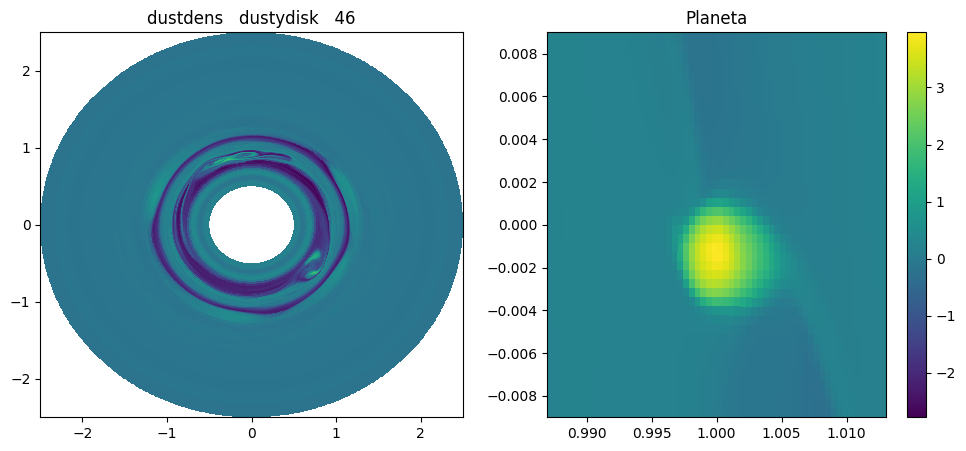

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Primer gráfico con pcolormesh
pcm1 = axs[0].pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data))
#axs[0].set_xlim(-1,1)
#axs[0].set_ylim(-1,1)
axs[0].set_title(data_name+'   '+output_name+'   '+output_number)

# Segundo gráfico con pcolormesh
pcm2 = axs[1].pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data/data0))
fig.colorbar(pcm2, ax=axs[1])
axs[1].set_xlim(1.0-0.013,1+0.013)
axs[1].set_ylim(-0.009,0.009)
axs[1].set_title('Planeta')
plt.savefig('/home/fangulo/entorno/'+data_name+'.png')

# MASS PLOT

30


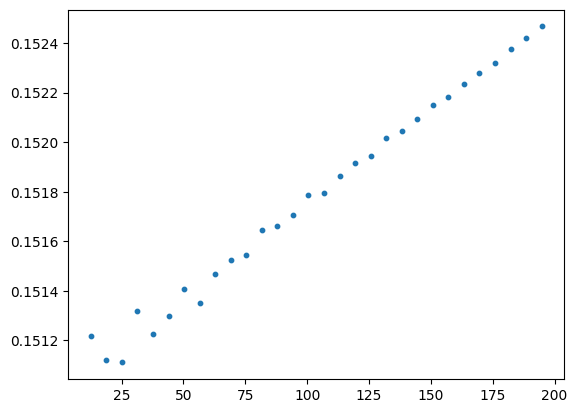

In [11]:
fluid = 'dust' #gas or dust
archivo_mass = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/monitor/'+fluid+'/mass.dat'

time_list = []
mass_list = []

with open(archivo_mass, "r") as archivo:
    for linea in archivo:
        time_i, mass_i = linea.strip().split()
        time_list.append(float(time_i))
        mass_list.append(float(mass_i))

time = np.array(time_list)
mass = np.array(mass_list)
plt.scatter(time,mass, s=10)

print(len(time))
#print(mass)
#print(time)
#plt.xlabel('time')
#plt.ylabel('mass')


# RESOLUTION PLOT

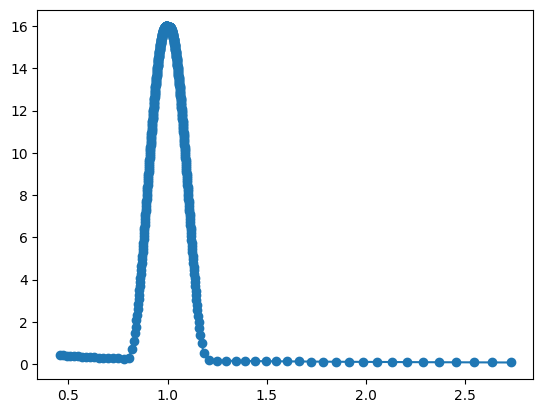

In [8]:
coord = y #x:phi, y:r
plt.plot(0.5*(coord[1:]+coord[:-1]),(0.007/(coord[1:]-coord[:-1])), '-o')

# ANIMATION

/tmp/ipykernel_261890/3437357860.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh1 = ax1.pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data0))
/tmp/ipykernel_261890/3437357860.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh2 = ax2.pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data0))


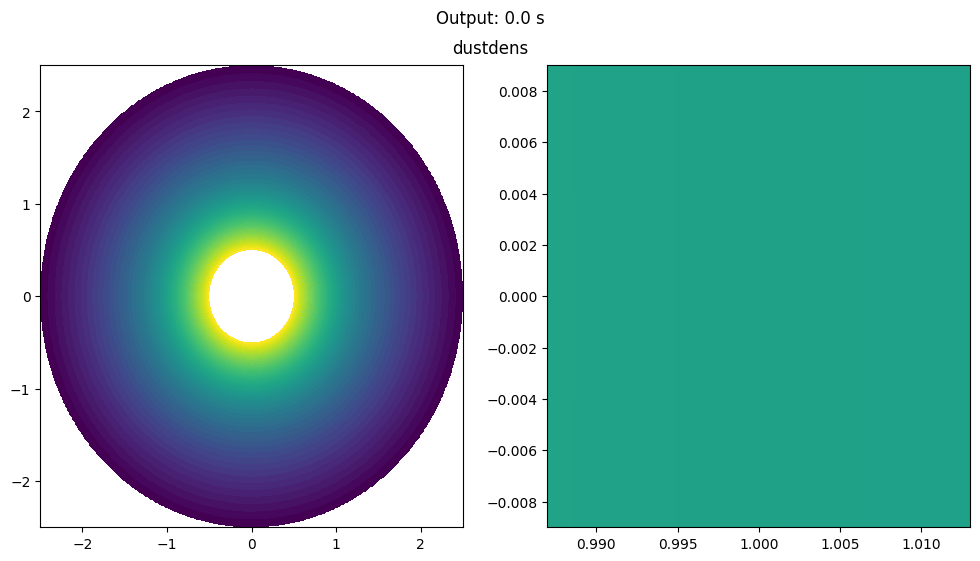

In [ ]:
archivos = []
for i in range(int(output_number)+1):
    archivo = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+data_name+str(i)+'.dat'
    archivos.append(archivo)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
mesh1 = ax1.pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data0))
mesh2 = ax2.pcolormesh((Y_MESH)*np.cos(X_MESH),Y_MESH*np.sin( X_MESH), np.log10(data0))
ax2.set_xlim(1.0-0.013,1+0.013)
ax2.set_ylim(-0.009,0.009)

texto_tiempo = fig.text(0.5, 0.95, '', ha='center', fontsize=12)
texto_data = fig.text(0.5, 0.90, data_name, ha='center', fontsize=12)

def actualizar(frame):
    data = np.fromfile(archivos[frame]).reshape(ny, nx)
    log_data = np.log10(data)

    # Actualizar los dos meshes con la misma data
    mesh1.set_array(log_data.ravel())
    mesh2.set_array(log_data.ravel())

    texto_tiempo.set_text(f"Output: {frame:.1f} s")

    return mesh1, mesh2, texto_tiempo

# Crear animación
ani = animation.FuncAnimation(fig, actualizar, frames=range(int(output_number)+1), interval=4000, blit=False)


writer = PillowWriter(fps=5, metadata={'loop': 0})
ani.save('/home/fangulo/entorno/'+output_name+'_'+data_name+'.gif',  writer=writer)
